# Imports

In [297]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import pandas as pd

# Functions

In [83]:
def generate_spending_data(conversion_rate, mean_of_logs_of_spend, variance_of_logs_of_spend, number_of_samples):
    
    data_revenue = np.random.lognormal(
        mean_of_logs_of_spend,
        np.sqrt(variance_of_logs_of_spend),
        number_of_samples,
    )
    data_all = np.random.binomial(1, conversion_rate, number_of_samples).astype(float)
    data_all[data_all > 0] = data_revenue[data_all > 0]

    return data_all


# Constants

In [3]:
true_data_conversion_rate = 0.01
true_mean_of_logs_of_spend = 2
true_variance_of_logs_of_spend = 2

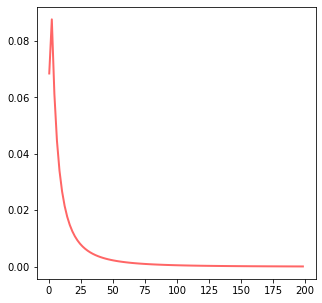

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))
x = np.linspace(
        scipy.stats.lognorm.ppf(0.01, np.sqrt(true_variance_of_logs_of_spend), 0, np.exp(true_mean_of_logs_of_spend)),
        scipy.stats.lognorm.ppf(0.99, np.sqrt(true_variance_of_logs_of_spend), 0, np.exp(true_mean_of_logs_of_spend)),
        100,
    )
    
ax.plot(x, scipy.stats.lognorm.pdf(x, np.sqrt(true_variance_of_logs_of_spend), 0, np.exp(true_mean_of_logs_of_spend)),
        "r-", lw=2, alpha=0.6,label="norm pdf",
    )

# Conversion rate priors

In [295]:
def simulate_posterior_means(a_prior, b_prior, num_of_spending_samples):
    posterior_means = []

    for i in range(1000):
        spends = generate_spending_data(true_data_conversion_rate, true_mean_of_logs_of_spend, true_variance_of_logs_of_spend,  num_of_spending_samples)
        total = len(spends)
        positives = len(spends[spends > 0])

        a_post_beta = positives + a_prior
        b_post_beta = total - positives + b_prior

        posterior_mean = a_post_beta/(a_post_beta+b_post_beta)
        posterior_means.append(posterior_mean)

    posterior_means = np.array(posterior_means)
    fig, ax = plt.subplots(figsize=(9, 6))
    sns.histplot(posterior_means- true_data_conversion_rate)
    print(f"Mean of the absolute errors of the simulated posterior means: {np.mean(np.abs(posterior_means- true_data_conversion_rate))}")
    print(f"Variance of the absolute errors of the simulated posterior means: {np.var(np.abs(posterior_means- true_data_conversion_rate))}")
    return np.mean(np.abs(posterior_means- true_data_conversion_rate))

In [299]:
df_results = pd.DataFrame(np.zeros((4,5)))

### Uninformative prior

In [300]:
a_prior = 1
b_prior = 1

Mean of the distribution: 0.5
Variance of the distribution: 0.08333333333333333


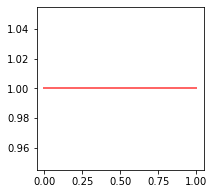

In [301]:
fig, ax = plt.subplots(figsize=(3, 3))
x = np.linspace(0, 1, 100)
ax.plot(x, scipy.stats.beta.pdf(x, a_prior, b_prior), "r-", lw=2, alpha=0.6, label="norm pdf")
print(f"Mean of the distribution: {a_prior/(a_prior+b_prior)}")
print(f"Variance of the distribution: {(a_prior*b_prior)/((a_prior+b_prior)**2*(a_prior+b_prior+1))}")

Mean of the absolute errors of the simulated posterior means: 0.002512175648702595
Variance of the absolute errors of the simulated posterior means: 3.942239433309029e-06


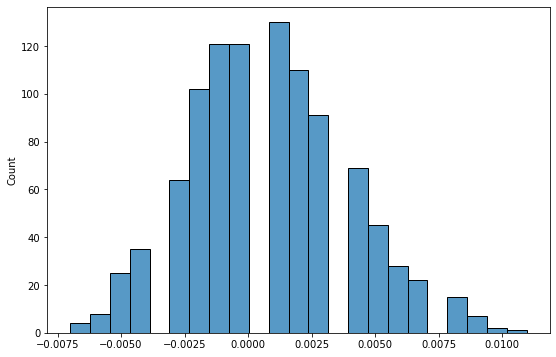

In [303]:
df_results.iloc[0,0] = simulate_posterior_means(a_prior, b_prior, 1000)

Mean of the absolute errors of the simulated posterior means: 0.0007969166166766646
Variance of the absolute errors of the simulated posterior means: 3.7104381785510506e-07


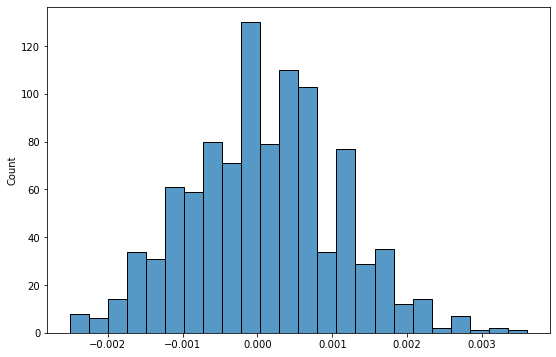

In [304]:
df_results.iloc[1,0] = simulate_posterior_means(a_prior, b_prior, 10000)

Mean of the absolute errors of the simulated posterior means: 0.00025189536209275815
Variance of the absolute errors of the simulated posterior means: 3.641841172880349e-08


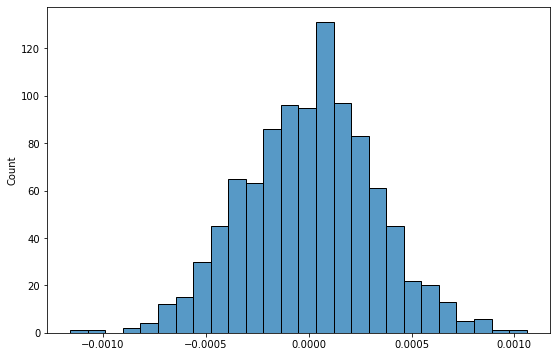

In [305]:
df_results.iloc[2,0] = simulate_posterior_means(a_prior, b_prior, 100000)

Mean of the absolute errors of the simulated posterior means: 7.994392011215978e-05
Variance of the absolute errors of the simulated posterior means: 3.3879228412486803e-09


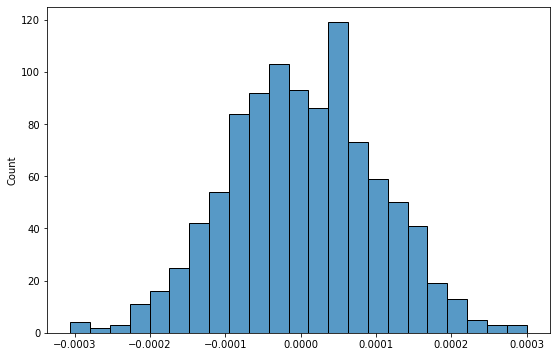

In [306]:
df_results.iloc[3,0] = simulate_posterior_means(a_prior, b_prior, 1000000)

### Informative prior (correct with larger variance)

In [307]:
a_prior = 0.01
b_prior = 0.99

Mean of the distribution: 0.01
Variance of the distribution: 0.00495


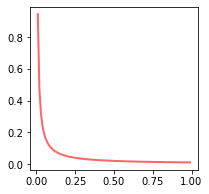

In [308]:
fig, ax = plt.subplots(figsize=(3, 3))
x = np.linspace(0, 1, 100)
ax.plot(x, scipy.stats.beta.pdf(x, a_prior, b_prior), "r-", lw=2, alpha=0.6, label="norm pdf")
print(f"Mean of the distribution: {a_prior/(a_prior+b_prior)}")
print(f"Variance of the distribution: {(a_prior*b_prior)/((a_prior+b_prior)**2*(a_prior+b_prior+1))}")

Mean of the absolute errors of the simulated posterior means: 0.002464535464535465
Variance of the absolute errors of the simulated posterior means: 3.58773194837131e-06


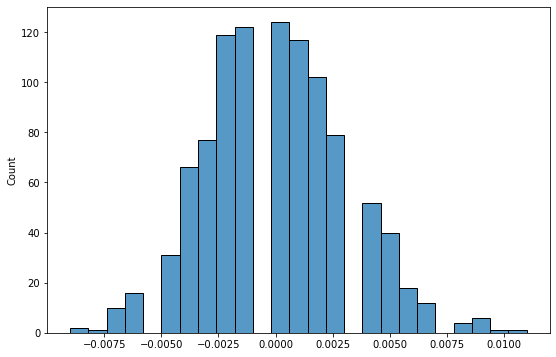

In [309]:
df_results.iloc[0,1] = simulate_posterior_means(a_prior, b_prior, 1000)

Mean of the absolute errors of the simulated posterior means: 0.0008326167383261675
Variance of the absolute errors of the simulated posterior means: 4.016603739086145e-07


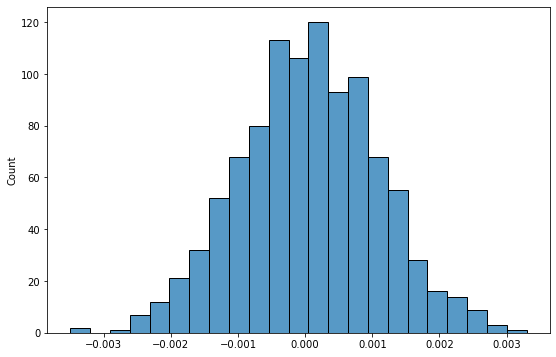

In [310]:
df_results.iloc[1,1] = simulate_posterior_means(a_prior, b_prior, 10000)

Mean of the absolute errors of the simulated posterior means: 0.0002459575404245958
Variance of the absolute errors of the simulated posterior means: 3.654814743339651e-08


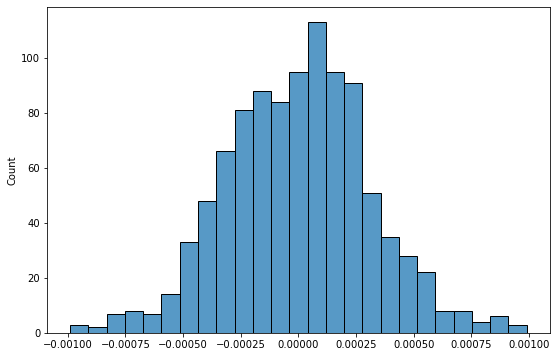

In [311]:
df_results.iloc[2,1] = simulate_posterior_means(a_prior, b_prior, 100000)

Mean of the absolute errors of the simulated posterior means: 7.968892031107964e-05
Variance of the absolute errors of the simulated posterior means: 3.8152866484228885e-09


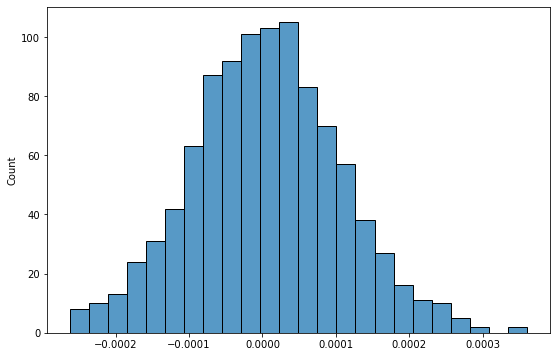

In [312]:
df_results.iloc[3,1] = simulate_posterior_means(a_prior, b_prior, 1000000)

### Informative prior (correct with smaller variance)

In [313]:
a_prior = 10
b_prior = 990

Mean of the distribution: 0.01
Variance of the distribution: 9.89010989010989e-06


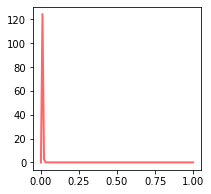

In [314]:
fig, ax = plt.subplots(figsize=(3, 3))
x = np.linspace(0, 1, 100)
ax.plot(x, scipy.stats.beta.pdf(x, a_prior, b_prior), "r-", lw=2, alpha=0.6, label="norm pdf")
print(f"Mean of the distribution: {a_prior/(a_prior+b_prior)}")
print(f"Variance of the distribution: {(a_prior*b_prior)/((a_prior+b_prior)**2*(a_prior+b_prior+1))}")

Mean of the absolute errors of the simulated posterior means: 0.0012640000000000001
Variance of the absolute errors of the simulated posterior means: 1.038304e-06


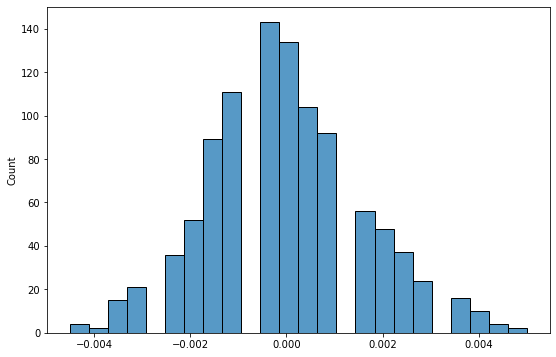

In [317]:
df_results.iloc[0,2] = simulate_posterior_means(a_prior, b_prior, 1000)

Mean of the absolute errors of the simulated posterior means: 0.0007194545454545456
Variance of the absolute errors of the simulated posterior means: 2.9988928925619833e-07


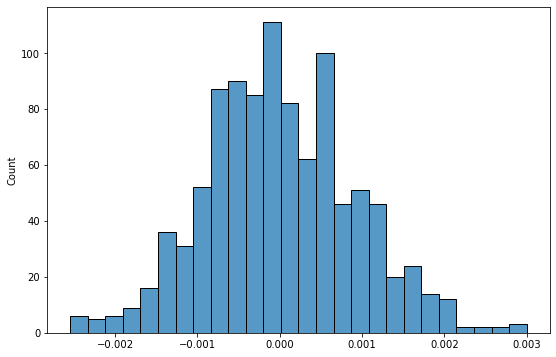

In [318]:
df_results.iloc[1,2] = simulate_posterior_means(a_prior, b_prior, 10000)

Mean of the absolute errors of the simulated posterior means: 0.0002491584158415844
Variance of the absolute errors of the simulated posterior means: 3.453404323105582e-08


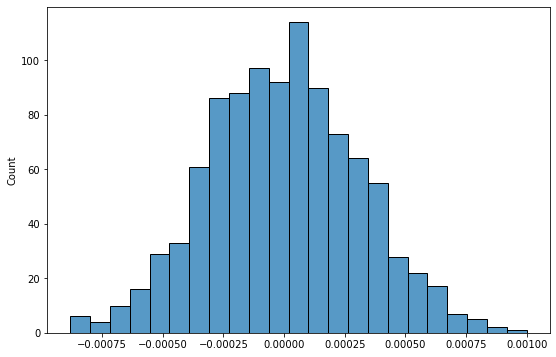

In [319]:
df_results.iloc[2,2] = simulate_posterior_means(a_prior, b_prior, 100000)

Mean of the absolute errors of the simulated posterior means: 7.659340659340664e-05
Variance of the absolute errors of the simulated posterior means: 3.5015345294066527e-09


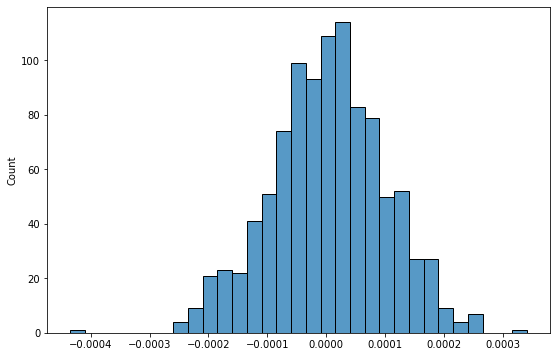

In [320]:
df_results.iloc[3,2] = simulate_posterior_means(a_prior, b_prior, 1000000)

### Informative prior (incorrect with larger variance)

In [321]:
a_prior = 2
b_prior = 98

Mean of the distribution: 0.02
Variance of the distribution: 0.00019405940594059405


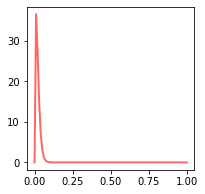

In [322]:
fig, ax = plt.subplots(figsize=(3, 3))
x = np.linspace(0, 1, 100)
ax.plot(x, scipy.stats.beta.pdf(x, a_prior, b_prior), "r-", lw=2, alpha=0.6, label="norm pdf")
print(f"Mean of the distribution: {a_prior/(a_prior+b_prior)}")
print(f"Variance of the distribution: {(a_prior*b_prior)/((a_prior+b_prior)**2*(a_prior+b_prior+1))}")

Mean of the absolute errors of the simulated posterior means: 0.002304545454545454
Variance of the absolute errors of the simulated posterior means: 3.5444421487603306e-06


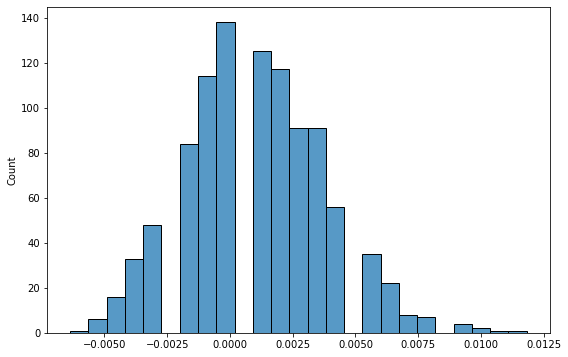

In [324]:
df_results.iloc[0,3] = simulate_posterior_means(a_prior, b_prior, 1000)

Mean of the absolute errors of the simulated posterior means: 0.0008240594059405941
Variance of the absolute errors of the simulated posterior means: 3.5132507597294374e-07


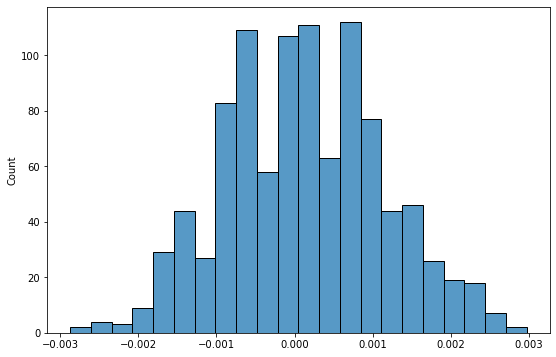

In [325]:
df_results.iloc[1,3] = simulate_posterior_means(a_prior, b_prior, 10000)

Mean of the absolute errors of the simulated posterior means: 0.0002459440559440559
Variance of the absolute errors of the simulated posterior means: 3.343148749352546e-08


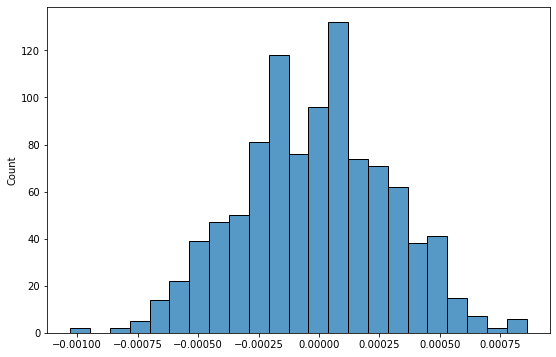

In [323]:
df_results.iloc[2,3] = simulate_posterior_means(a_prior, b_prior, 100000)

Mean of the absolute errors of the simulated posterior means: 7.873912608739123e-05
Variance of the absolute errors of the simulated posterior means: 3.76277839769268e-09


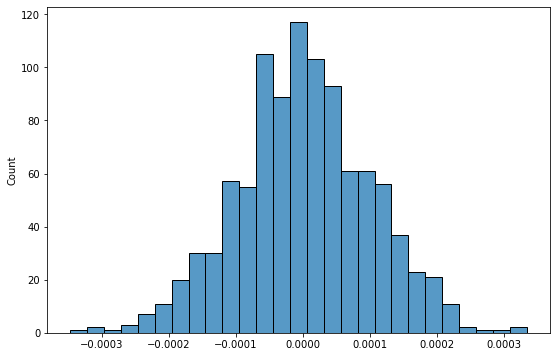

In [326]:
df_results.iloc[3,3] = simulate_posterior_means(a_prior, b_prior, 1000000)

### Informative prior (incorrect with smaller variance)

In [327]:
a_prior = 20
b_prior = 980

Mean of the distribution: 0.02
Variance of the distribution: 1.958041958041958e-05


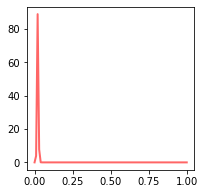

In [328]:
fig, ax = plt.subplots(figsize=(3, 3))
x = np.linspace(0, 1, 100)
ax.plot(x, scipy.stats.beta.pdf(x, a_prior, b_prior), "r-", lw=2, alpha=0.6, label="norm pdf")
print(f"Mean of the distribution: {a_prior/(a_prior+b_prior)}")
print(f"Variance of the distribution: {(a_prior*b_prior)/((a_prior+b_prior)**2*(a_prior+b_prior+1))}")

Mean of the absolute errors of the simulated posterior means: 0.005008000000000001
Variance of the absolute errors of the simulated posterior means: 2.4034360000000003e-06


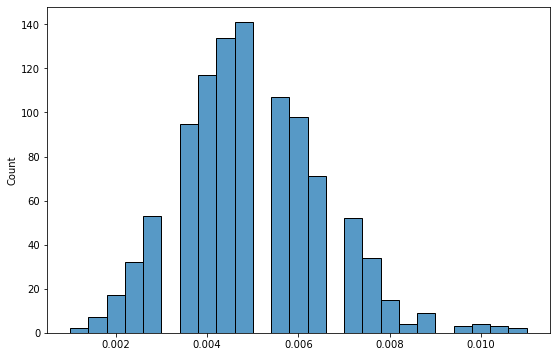

In [329]:
df_results.iloc[0,4] = simulate_posterior_means(a_prior, b_prior, 1000)

Mean of the absolute errors of the simulated posterior means: 0.0010721818181818178
Variance of the absolute errors of the simulated posterior means: 5.47070776859504e-07


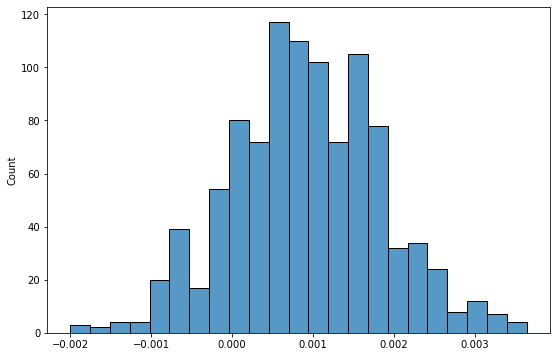

In [330]:
df_results.iloc[1,4] = simulate_posterior_means(a_prior, b_prior, 10000)

Mean of the absolute errors of the simulated posterior means: 0.00025284158415841604
Variance of the absolute errors of the simulated posterior means: 3.8612746887560074e-08


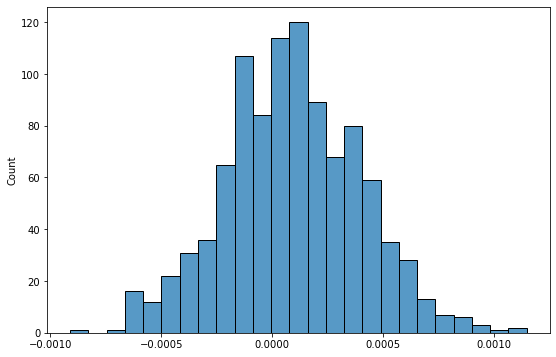

In [331]:
df_results.iloc[2,4] = simulate_posterior_means(a_prior, b_prior, 100000)

Mean of the absolute errors of the simulated posterior means: 7.8974025974026e-05
Variance of the absolute errors of the simulated posterior means: 3.5719028134702373e-09


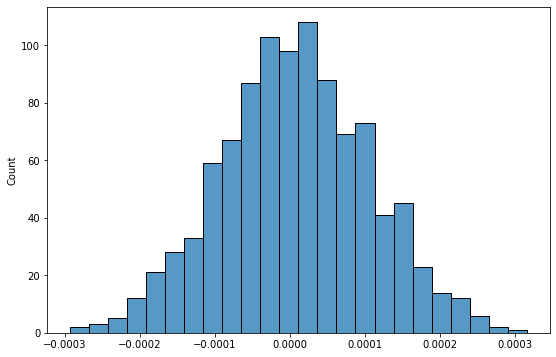

In [332]:
df_results.iloc[3,4] = simulate_posterior_means(a_prior, b_prior, 1000000)

In [333]:
df_results

,0,1,2,3,4
0,0.002512,0.002465,0.001264,0.002305,0.005008
1,0.000797,0.000833,0.000719,0.000824,0.001072
2,0.000252,0.000246,0.000249,0.000246,0.000253
3,0.000080,0.000080,0.000077,0.000079,0.000079
